In [2]:
from data.dataset import BaseDataset
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA

Device: cpu
Epochs: 200
Random seed set at: 21


In [3]:
dataset = BaseDataset()
df = dataset.df

Loading the dataset...
Features stats:
Mean: 0.0	Std: 0.25	Median: 0.0


In [39]:
pca = PCA(n_components=0.9) # If using a n_components < 1, the algorithm chooses the % of variation to retain
pca.fit(df.iloc[:,3:])
pca_data = pca.transform(df.iloc[:,3:])

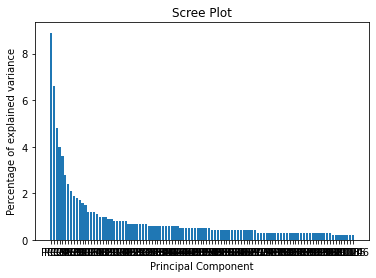

In [40]:
# Scree Plot
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
labels = ['PC' + str(x) for x in range(1,len(per_var)+1)]

import matplotlib.pyplot as plt
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

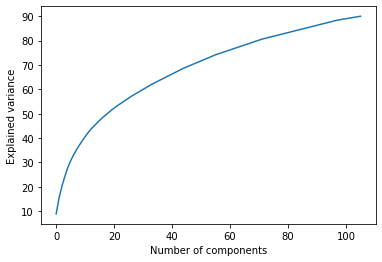

In [41]:
plt.plot(np.cumsum(per_var))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

In [60]:
columns = ['PC'+str(x) for x in range(1,pca_data.shape[1]+1)]
pca_df = pd.DataFrame(pca_data, columns=columns)

pca_df['permno'] =  df['permno']
pca_df['yyyymm'] = df['yyyymm']
pca_df['ret'] = df['ret']

In [62]:
new_order_columns = ['permno','yyyymm','ret']
new_order_columns.extend(columns)
pca_df = pca_df[new_order_columns]